### Importación de datos



In [79]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Unificar los datos de todas las tiendas en un df
# Agregar columna de tienda
tienda_1["Tienda"] = "Tienda 1"
tienda_2["Tienda"] = "Tienda 2"
tienda_3["Tienda"] = "Tienda 3"
tienda_4["Tienda"] = "Tienda 4"

# Concatenar
df_tiendas = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

# Convertir fecha a datetime
df_tiendas["Fecha de Compra"] = pd.to_datetime(df_tiendas["Fecha de Compra"], dayfirst=True)

# Exportar df consolidado a CSV
ruta_salida = "ventas_alura_store_consolidado.csv"
df_tiendas.to_csv(ruta_salida,
                  index=False,
                  sep=';',
                  decimal=',',
                  encoding='utf-8')

print(f"✅ Archivo exportado: {ruta_salida}")
print(f"Tamaño del dataset: {df_tiendas.shape[0]} filas x {df_tiendas.shape[1]} columnas")

#Imprimo shape del df consolidado para ver su composición (filas y columnas)
print(df_tiendas.shape)
df_tiendas.head()


✅ Archivo exportado: ventas_alura_store_consolidado.csv
Tamaño del dataset: 9435 filas x 13 columnas
(9435, 13)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [81]:
print("Valores nulos:\n")
print(df_tiendas.isnull().sum())

print("\nResumen estadístico:\n")
print(df_tiendas.describe())

# Calcular facturación por tienda
facturacion_tienda1 = tienda_1['Precio'].sum()
facturacion_tienda2 = tienda_2['Precio'].sum()
facturacion_tienda3 = tienda_3['Precio'].sum()
facturacion_tienda4 = tienda_4['Precio'].sum()

# Mostrar resultados con separador de miles,sin decimales, formato peso colombiano COP
print("\nFacturación por tienda:")
print(f"Tienda 1: ${facturacion_tienda1:,.0f}".replace(",", "."))
print(f"Tienda 2: ${facturacion_tienda2:,.0f}".replace(",", "."))
print(f"Tienda 3: ${facturacion_tienda3:,.0f}".replace(",", "."))
print(f"Tienda 4: ${facturacion_tienda4:,.0f}".replace(",", "."))

# Facturación total
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total: ${facturacion_total:,.0f}".replace(",", "."))

Valores nulos:

Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
Tienda                    0
dtype: int64

Resumen estadístico:

             Precio  Costo de envío                Fecha de Compra  \
count  9.435000e+03     9435.000000                           9435   
mean   4.667323e+05    24875.145734  2021-08-16 07:36:48.076311808   
min    7.600000e+03        0.000000            2020-01-01 00:00:00   
25%    5.520000e+04     3000.000000            2020-10-27 00:00:00   
50%    2.215000e+05    11700.000000            2021-08-22 00:00:00   
75%    6.633000e+05    34900.000000            2022-06-04 12:00:00   
max    2.977000e+06   162500.000000            2023-03-31 00:00:00   
std    5.903207e+05    3

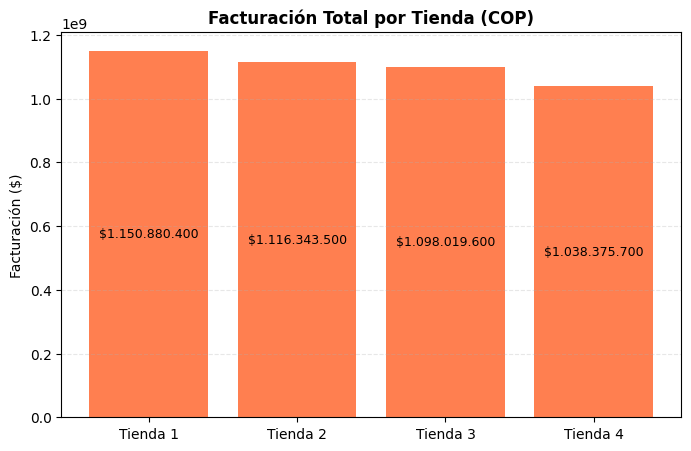

In [82]:
# Gráfico de barras con matplotlib
facturacion = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, facturacion, color='coral')
plt.title('Facturación Total por Tienda (COP)',fontweight='bold')
plt.ylabel('Facturación ($)')

# Agregar valores formateados dentro de las barras
for barra, monto in zip(barras, facturacion):
    texto = f"${int(monto):,}".replace(",", ".")
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height()/2, texto,
             ha='center', va='center', color='black', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 2. Ventas por categoría

In [83]:
# Top 5 categorías más vendidas por cada tienda

# Tienda 1
top_categorias_t1 = tienda_1['Categoría del Producto'].value_counts().head(5)
print("Top 5 Tienda 1:")
print(top_categorias_t1)
print()

# Tienda 2
top_categorias_t2 = tienda_2['Categoría del Producto'].value_counts().head(5)
print("Top 5 Tienda 2:")
print(top_categorias_t2)
print()

# Tienda 3
top_categorias_t3 = tienda_3['Categoría del Producto'].value_counts().head(5)
print("Top 5 Tienda 3:")
print(top_categorias_t3)
print()

# Tienda 4
top_categorias_t4 = tienda_4['Categoría del Producto'].value_counts().head(5)
print("Top 5 Tienda 4:")
print(top_categorias_t4)
print()

Top 5 Tienda 1:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64

Top 5 Tienda 2:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: count, dtype: int64

Top 5 Tienda 3:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: count, dtype: int64

Top 5 Tienda 4:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: count, dtype: int64



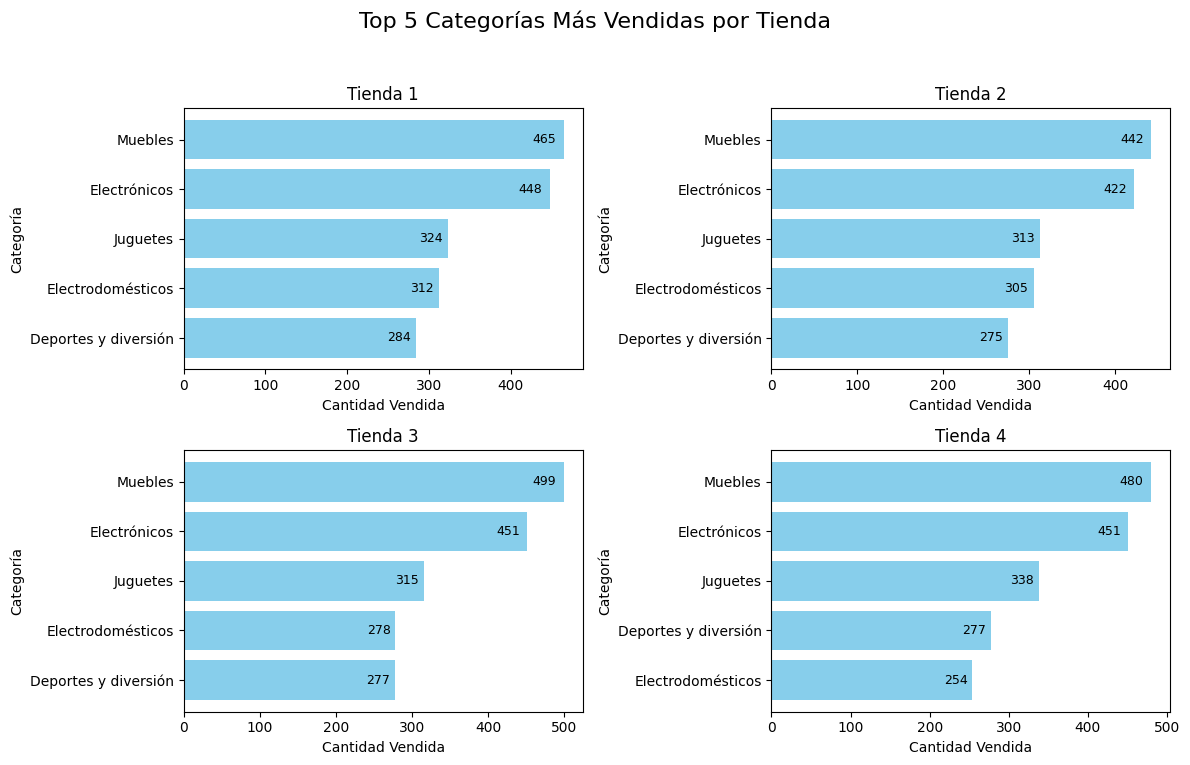

In [84]:
# Preparar gráfico
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Top 5 Categorías Más Vendidas por Tienda", fontsize=16)
axes = axes.flatten()

# Datos por tienda
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, tienda in enumerate(tiendas):
    top = tienda['Categoría del Producto'].value_counts().head(5)
    categorias = top.index[::-1]  # Se invierte el orden para que la más vendida esté arriba
    cantidades = top.values[::-1]

    bars = axes[i].barh(categorias, cantidades, color='skyblue')
    axes[i].set_title(nombres_tiendas[i])
    axes[i].set_xlabel("Cantidad Vendida")
    axes[i].set_ylabel("Categoría")

    # Mostrar valores dentro de las barras
    for bar in bars:
        width = bar.get_width()
        axes[i].text(width * 0.98, bar.get_y() + bar.get_height()/2, str(int(width)),
                     ha='right', va='center', fontsize=9, color='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Calificación promedio de la tienda


In [85]:
# Determinar la calificación promedio por tienda

calificacion_promedio_t1 = tienda_1['Calificación'].mean()
calificacion_promedio_t2 = tienda_2['Calificación'].mean()
calificacion_promedio_t3 = tienda_3['Calificación'].mean()
calificacion_promedio_t4 = tienda_4['Calificación'].mean()

# Imprimir resultados redondeados a 2 decimales
print("Calificación promedio por tienda:\n")
print(f"Tienda 1: {calificacion_promedio_t1:.2f}")
print(f"Tienda 2: {calificacion_promedio_t2:.2f}")
print(f"Tienda 3: {calificacion_promedio_t3:.2f}")
print(f"Tienda 4: {calificacion_promedio_t4:.2f}")


Calificación promedio por tienda:

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


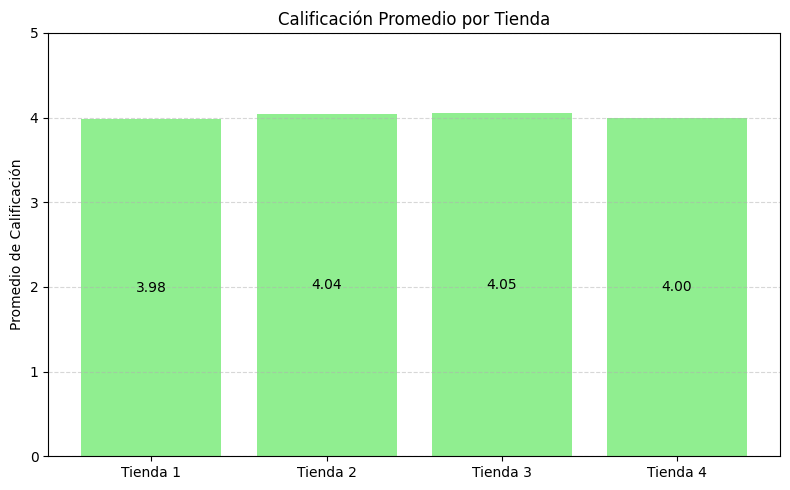

In [86]:
# Datos para generar el gráfico
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
calificaciones = [
    calificacion_promedio_t1,
    calificacion_promedio_t2,
    calificacion_promedio_t3,
    calificacion_promedio_t4,
]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(nombres_tiendas, calificaciones, color='lightgreen')

# Agregar valores dentro de las barras
for i, bar in enumerate(bars):
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        altura / 2,  # Centrado verticalmente
        f"{altura:.2f}",
        ha='center',
        va='center',
        color='black',
        fontsize=10
    )

plt.title("Calificación Promedio por Tienda")
plt.ylabel("Promedio de Calificación")
plt.ylim(0, 5)  # Escala de 0 a 5 porque las calificaciones están en dicho rango
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [88]:
# Función para mostrar el producto más y menos vendido por cada tienda
def mostrar_mas_menos_vendidos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()
    producto_mas_vendido = conteo.idxmax()
    cantidad_mas_vendido = conteo.max()
    producto_menos_vendido = conteo.idxmin()
    cantidad_menos_vendido = conteo.min()

    # Determinar si se usa "venta" o "ventas" (plural o singular)
    sufijo_mas = "venta" if cantidad_mas_vendido == 1 else "ventas"
    sufijo_menos = "venta" if cantidad_menos_vendido == 1 else "ventas"

    print(f"\n{nombre_tienda}:")
    print(f" Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} {sufijo_mas})")
    print(f" Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendido} {sufijo_menos})")

    return producto_mas_vendido, cantidad_mas_vendido, producto_menos_vendido, cantidad_menos_vendido

# Listas para los datos de visualización
productos_mas = []
ventas_mas = []
productos_menos = []
ventas_menos = []

# Ejecución para cada tienda
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
dataframes = [tienda_1, tienda_2, tienda_3, tienda_4]

for df, nombre_tienda in zip(dataframes, tiendas):
    mas, cant_mas, menos, cant_menos = mostrar_mas_menos_vendidos(df, nombre_tienda)
    productos_mas.append(mas)
    ventas_mas.append(cant_mas)
    productos_menos.append(menos)
    ventas_menos.append(cant_menos)



Tienda 1:
 Producto más vendido: Microondas (60 ventas)
 Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
 Producto más vendido: Iniciando en programación (65 ventas)
 Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
 Producto más vendido: Kit de bancas (57 ventas)
 Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
 Producto más vendido: Cama box (62 ventas)
 Producto menos vendido: Guitarra eléctrica (33 ventas)


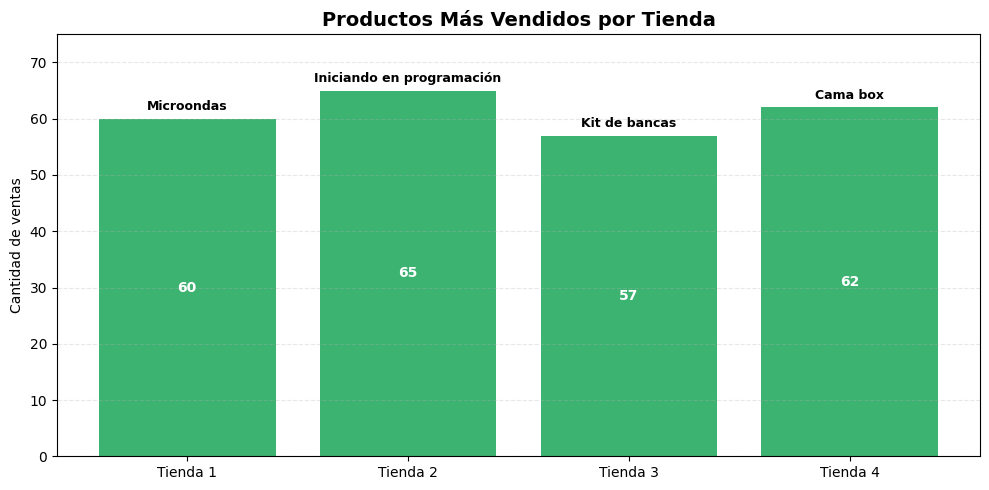

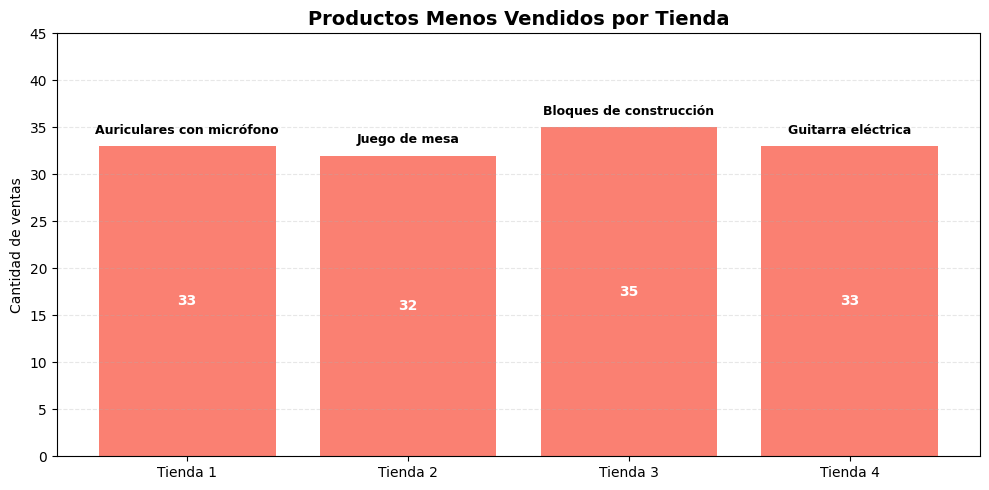

In [89]:
#Gráfico con productos más vendidos por tienda
plt.figure(figsize=(10, 5))
barras1 = plt.bar(tiendas, ventas_mas, color='mediumseagreen')
plt.title("Productos Más Vendidos por Tienda", fontsize=14, fontweight='bold')
plt.ylabel("Cantidad de ventas")

for i, barra in enumerate(barras1):
    # Nombre del producto arriba de la barra
    plt.text(barra.get_x() + barra.get_width() / 2,
             barra.get_height() + 1,
             productos_mas[i],
             ha='center',
             va='bottom',
             fontsize=9,
             fontweight='bold')

    # Cantidad dentro de la barra
    plt.text(barra.get_x() + barra.get_width() / 2,
             barra.get_height() / 2,
             str(ventas_mas[i]),
             ha='center',
             va='center',
             fontsize=10,
             color='white',
             fontweight='bold')

plt.ylim(0, max(ventas_mas) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Gráfico con productos menos vendidos por tienda
plt.figure(figsize=(10, 5))
barras2 = plt.bar(tiendas, ventas_menos, color='salmon')
plt.title("Productos Menos Vendidos por Tienda", fontsize=14, fontweight='bold')
plt.ylabel("Cantidad de ventas")

for i, barra in enumerate(barras2):
    # Nombre del producto arriba de la barra
    plt.text(barra.get_x() + barra.get_width() / 2,
             barra.get_height() + 1,
             productos_menos[i],
             ha='center',
             va='bottom',
             fontsize=9,
             fontweight='bold')

    # Cantidad dentro de la barra
    plt.text(barra.get_x() + barra.get_width() / 2,
             barra.get_height() / 2,
             str(ventas_menos[i]),
             ha='center',
             va='center',
             fontsize=10,
             color='white',
             fontweight='bold')

plt.ylim(0, max(ventas_menos) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda




In [91]:
# Determinar costo promedio de envío por tienda
envio_prom_t1 = tienda_1['Costo de envío'].mean()
envio_prom_t2 = tienda_2['Costo de envío'].mean()
envio_prom_t3 = tienda_3['Costo de envío'].mean()
envio_prom_t4 = tienda_4['Costo de envío'].mean()

# Mostrar resultados redondeados con separador de miles y sin decimales Pesos colombianos (COP)
print("\nCosto promedio de envío por tienda:")
print(f"Tienda 1: COP ${envio_prom_t1:,.0f}".replace(",", "."))
print(f"Tienda 2: COP ${envio_prom_t2:,.0f}".replace(",", "."))
print(f"Tienda 3: COP ${envio_prom_t3:,.0f}".replace(",", "."))
print(f"Tienda 4: COP ${envio_prom_t4:,.0f}".replace(",", "."))



Costo promedio de envío por tienda:
Tienda 1: COP $26.019
Tienda 2: COP $25.216
Tienda 3: COP $24.806
Tienda 4: COP $23.459


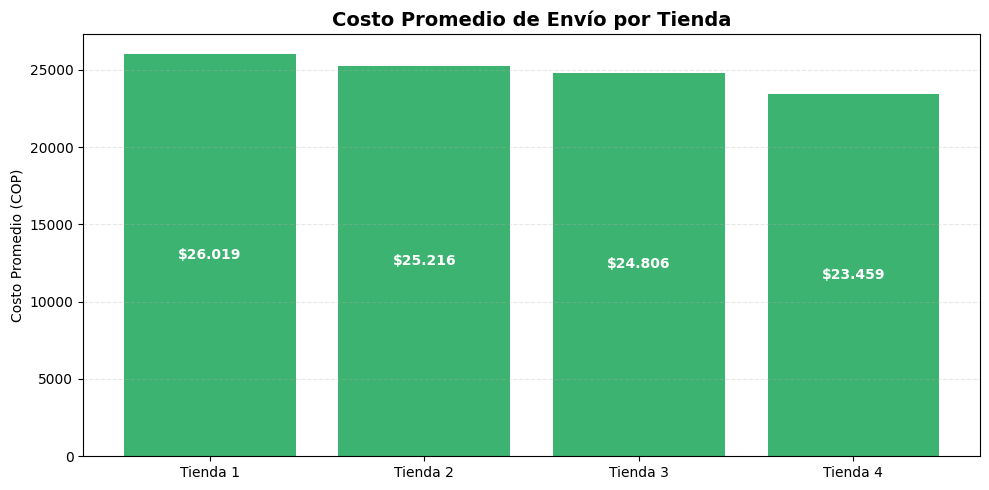

In [92]:
# Datos para generar gráfico
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
envios = [envio_prom_t1, envio_prom_t2, envio_prom_t3, envio_prom_t4]

# Crear gráfico
plt.figure(figsize=(10, 5))
barras = plt.bar(tiendas, envios, color='mediumseagreen')
plt.title("Costo Promedio de Envío por Tienda", fontsize=14, fontweight='bold')
plt.ylabel("Costo Promedio (COP)")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Agregar valores dentro de las barras
for i, barra in enumerate(barras):
    valor = f"${envios[i]:,.0f}".replace(",", ".")
    plt.text(barra.get_x() + barra.get_width() / 2,
             barra.get_height() / 2,
             valor,
             ha='center',
             va='center',
             fontsize=10,
             color='white',
             fontweight='bold')

plt.tight_layout()
plt.show()



## Conclusiones del Análisis – Alura Store

### 1. Facturación Total por Tienda
- **Tienda 1** es la que más factura, con ingresos superiores a **1.150 mil millones COP**.
- **Tienda 4** presenta la facturación más baja, cercana a **1.038 mil millones COP**.

### 2. Categorías Más Populares
- Las categorías más vendidas varían entre tiendas, pero se destacan:
  - **Electrodomésticos** (ej. Microondas)
  - **Tecnología y Educación** (ej. Iniciando en programación)
  - **Muebles y Hogar** (ej. Kit de bancas, Cama box)

### 3. Productos Más y Menos Vendidos
- **Productos más vendidos por tienda:**
  - *Tienda 1:* Microondas (60 ventas)
  - *Tienda 2:* Iniciando en programación (65 ventas)
  - *Tienda 3:* Kit de bancas (57 ventas)
  - *Tienda 4:* Cama box (62 ventas)
- **Productos menos vendidos por tienda:**
  - *Tienda 1:* Auriculares con micrófono (33 ventas)
  - *Tienda 2:* Juego de mesa (32 ventas)
  - *Tienda 3:* Bloques de construcción (35 ventas)
  - *Tienda 4:* Guitarra eléctrica (33 ventas)

### 4. Calificación Promedio por Tienda
- Las calificaciones promedio están en un rango **positivo**, con valores cercanos a **4 sobre 5** en todas las tiendas, indicando una **buena experiencia de cliente**.

### 5. Costo Promedio de Envío
- Las tiendas tienen **variación significativa** en el costo promedio de envío.
- Es importante revisar este punto como posible **oportunidad de optimización logística**.

## Recomendación Final

La **Tienda 4** muestra el desempeño más bajo en:
- Facturación total.
- Evaluación de clientes.
- Popularidad y rotación de productos.

**Por lo tanto, se recomienda al Sr. Juan vender la Tienda 4** para liberar capital e invertir en un nuevo negocio más rentable y aportar al crecimiento sostenible de Alura Store.

# EXTRA. Análisis del desempeño geográfico

In [97]:
# Preparación de los datos
# Agrupar ventas por ciudad y tienda, sumando los valores de 'Precio'
df_ciudades = (
    df_tiendas
    .groupby(['Lugar de Compra', 'Tienda'])['Precio']
    .sum()
    .reset_index() # Convertir el índice jerárquico en columnas normales
)

# Reorganizar los datos en una tabla tipo matriz (ciudades como filas, tiendas como columnas)
tabla = df_ciudades.pivot(
    index='Lugar de Compra',  # Fila = Ciudad
    columns='Tienda',         # Columna = Tienda
    values='Precio'           # Valor = Suma de precios
).fillna(0)                   # Reemplazar valores nulos por 0 (como medida de validación de datos)

# Mostrar la tabla con formato de miles en puntos y moneda COP
print("\nVentas totales por ciudad y tienda (COP):\n")
print(tabla.applymap(lambda x: f"COP {x:,.0f}".replace(',', '.')))


Ventas totales por ciudad y tienda (COP):

Tienda                  Tienda 1         Tienda 2         Tienda 3  \
Lugar de Compra                                                      
Armenia            COP 4.615.700    COP 3.363.200    COP 3.980.300   
Barranquilla      COP 32.907.700   COP 27.741.300   COP 36.768.500   
Bogotá           COP 440.005.000  COP 479.959.200  COP 475.562.100   
Bucaramanga       COP 17.579.200   COP 23.895.600   COP 23.538.900   
Cali             COP 154.493.700  COP 118.257.600  COP 109.287.600   
Cartagena         COP 22.296.700   COP 21.548.300   COP 34.144.100   
Cúcuta            COP 37.879.500   COP 28.991.500   COP 25.165.500   
Inírida            COP 2.722.500    COP 2.504.600    COP 1.333.700   
Leticia           COP 14.669.800   COP 16.159.000   COP 19.212.800   
Manizales          COP 8.027.600    COP 3.539.900    COP 6.501.800   
Medellín         COP 296.858.100  COP 297.246.700  COP 250.580.600   
Neiva              COP 3.494.000    COP 3.839.

/tmp/ipython-input-97-2604602154.py:19: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [98]:
# Paso 1: Resetear índice de la tabla de ventas por ciudad y tienda
tabla_reset = tabla.reset_index()

# Paso 2: Obtener coordenadas promedio por ciudad desde el DataFrame consolidado.
# No afecta el resultado final, porque el dataset sólo contiene 1 coordenada por ciudad
# En caso futuro que hubiera más de 1 coordenada por ciudad, es útil usar el promedio para graficar
coordenadas = (
    df_tiendas.groupby('Lugar de Compra')[['lat', 'lon']]
    .mean()
    .round(5)
    .reset_index()
)

# Paso 3: Agregar columna de coordenadas concatenadas tipo "lat / lon" para visualización
coordenadas['Coordenadas'] = coordenadas.apply(lambda row: f"{row['lat']} / {row['lon']}", axis=1)

# Paso 4: Unir coordenadas con la tabla de ventas
tabla_final = pd.merge(tabla_reset, coordenadas, how='left', on='Lugar de Compra')

# Paso 5: Reorganizar columnas
columnas_ordenadas = ['Lugar de Compra', 'Coordenadas', 'lat', 'lon'] + list(tabla.columns)
tabla_final = tabla_final[columnas_ordenadas]

# Paso 6: Establecer índice de múltiples columnas (Ciudad, Coordenadas)
tabla_final.set_index(['Lugar de Compra', 'Coordenadas'], inplace=True)

# Paso 7: Crear columna combinada para etiquetas más limpias
tabla_final['Ciudad_Coord'] = tabla_final.apply(
    lambda row: f"{row.name[0]} – ({row.name[1]})", axis=1
)

# Paso 8: Resetear índice para reorganizar
tabla_final_reset = tabla_final.reset_index(drop=True)

# Paso 9: Usar 'Ciudad_Coord' como nuevo índice para graficar o mapear
tabla_final_reset.set_index('Ciudad_Coord', inplace=True)


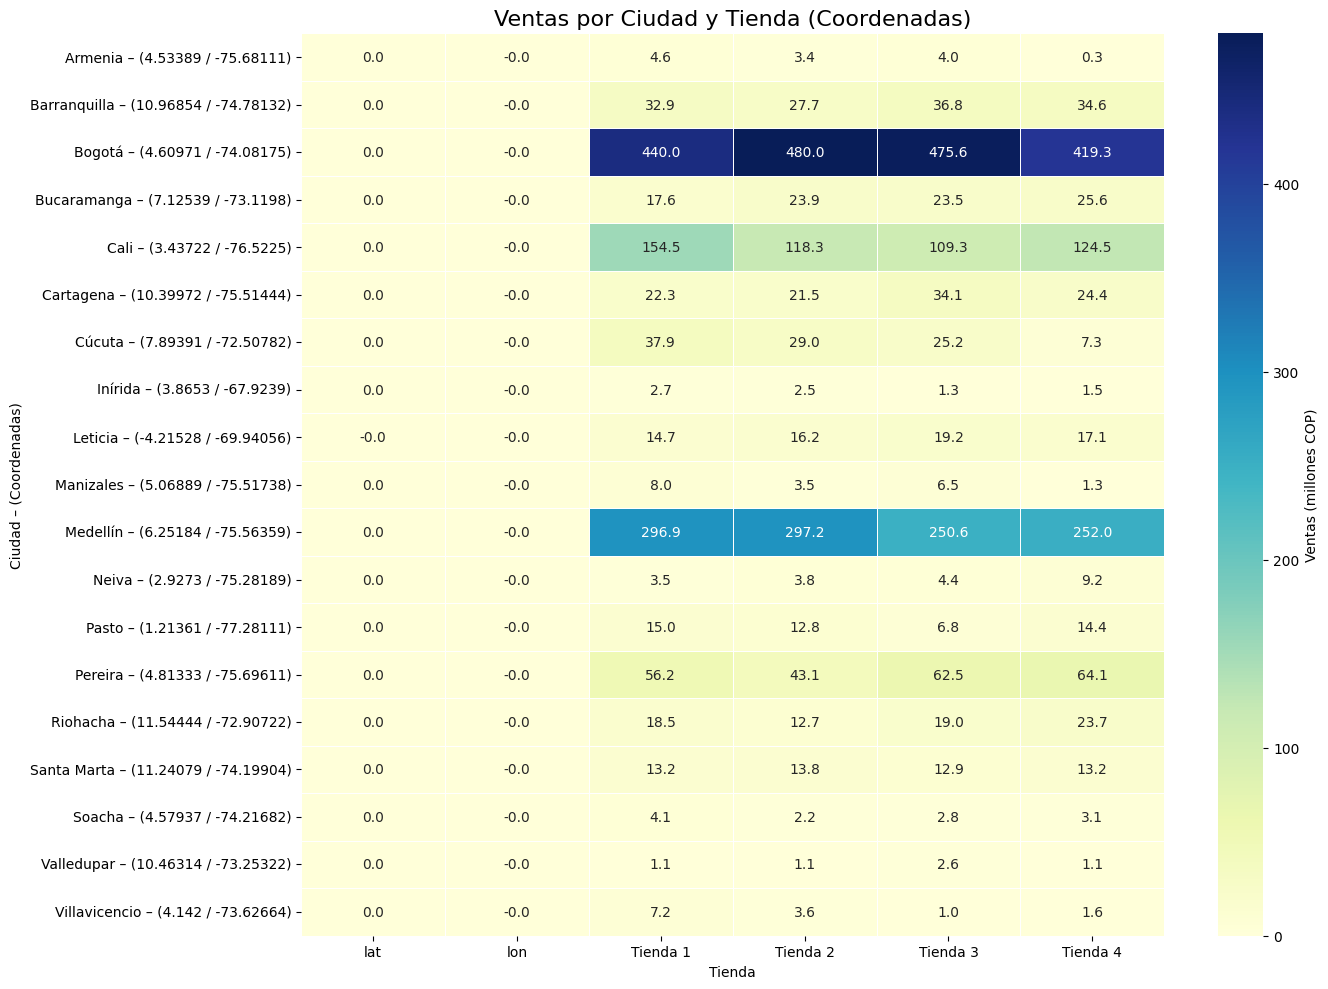

In [101]:
# Importamos la librería Seaborn para visualizaciones estadísticas basadas en matplotlib
import seaborn as sns

# Establecemos el tamaño de la figura del gráfico
plt.figure(figsize=(14, 10))
# Creamos un mapa de calor (heatmap) con los datos de ventas por ciudad y tienda
sns.heatmap(
    tabla_final_reset / 1e6,      # Dividimos por 1e6 para mostrar ventas en millones de COP
    annot=True,                   # Muestra los valores numéricos directamente en cada celda
    fmt=".1f",                    # Formato numérico con 1 decimal
    cmap="YlGnBu",                # Paleta de colores: amarillo → verde → azul
    linewidths=0.5,               # Líneas divisorias entre celdas para mayor legibilidad
    cbar_kws={'label': 'Ventas (millones COP)'} # Etiqueta de la barra de color
)

plt.title("Ventas por Ciudad y Tienda (Coordenadas)", fontsize=16)
plt.ylabel("Ciudad – (Coordenadas)")
plt.xlabel("Tienda")
plt.tight_layout()                # Ajuste automático del layout para evitar sobreposición de textos
plt.show()


In [103]:
# Importamos la biblioteca folium para visualización geográfica interactiva
import folium

# Agregar columna 'Total' con la suma de ventas por ciudad
tabla_final_reset['Total'] = tabla_final_reset.sum(axis=1)

# Crear mapa centrado en Colombia
m = folium.Map(location=[4.5709, -74.2973],   # Coordenadas geográficas del centro de Colombia
               zoom_start=5.5,                # Nivel de zoom inicial
               tiles='CartoDB positron')      # Estilo de mapa

# Agregar marcadores proporcionales por ciudad
for idx, row in tabla_final_reset.iterrows():
    # Contenido del globo de información al hacer clic en el marcador
    popup_text = f"<b>{idx}</b><br>Total ventas: COP {row['Total']:.0f}"
    # Agrega un marcador circular con radio proporcional a las ventas
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['Total'] / 1e9,  # Ajuste para divisor según escala
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=200) # Información emergente
    ).add_to(m)

# Mostrar mapa
m


In [105]:
import plotly.express as px

# Agregar columna de ventas totales por ciudad (si no existe aún)
if 'Total' not in tabla_final_reset.columns:
    tabla_final_reset['Total'] = tabla_final_reset.sum(axis=1)

# Crear DataFrame con los datos para gráfico en Plotly
df_plotly = tabla_final_reset.reset_index()[[
    'Ciudad_Coord', 'lat', 'lon', 'Total'
]].copy()

# Convertir los valores de venta en millones para facilitar la lectura
df_plotly['Total (millones COP)'] = df_plotly['Total'] / 1e6

# Gráfico interactivo con Plotly
fig = px.scatter_mapbox(
    df_plotly,
    lat='lat',
    lon='lon',
    size='Total (millones COP)',                  # Tamaño proporcional
    hover_name='Ciudad_Coord',                    # Nombre que se muestra en el hover
    hover_data={'lat': False, 'lon': False},      # Oculta lat/lon adicionales
    size_max=50,
    color='Total (millones COP)',                 # Escala de color
    color_continuous_scale='Blues',
    zoom=4,
    height=600
)

fig.update_layout(
    mapbox_style='carto-positron',
    title='Ventas por Ciudad (Plotly Map)',
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()



# EXTRA. Análisis del desempeño geográfico

## 1. Objetivo

Este análisis busca responder las siguientes preguntas clave:

- ¿Dónde se concentran geográficamente las ventas de cada tienda?
- ¿Qué zonas muestran mayor rendimiento?
- ¿Existen patrones geográficos que puedan explicar el desempeño diferencial entre tiendas?

---

## 2. Metodología y herramientas utilizadas

- Consolidación de datos por ciudad y tienda.
- Unificación pares de coordenadas por ciudad (lat/lon), para efectos de agrupación.
- Generar distintos tipos de visualización con:
  - **Heatmap** de ventas por ciudad y tienda.
  - **Mapa interactivo con Folium** (círculos proporcionales).
  - **Mapa interactivo con Plotly** (escalas continuas de color).

---

## 3. Principales Hallazgos

### a. Heatmap de ventas
- **Bogotá** domina ampliamente las ventas en todas las tiendas, superando los COP 400 millones por tienda, lo que representa más del 25 % del total consolidado.
- **Medellín** se posiciona como la segunda ciudad con mejor rendimiento, con ventas por tienda en torno a los **COP 250–297 millones**
- **Cali** también destaca con cifras sobre los  **COP 100 millones** por tienda, consolidándose como un polo relevante de consumo.
- **Tiendas 1 y 2** tienden a tener mayor impacto en zonas urbanas densas (como Bogotá, Medellín, Cali), lo cual sugiere una mejor penetración o posicionamiento en áreas metropolitanas.
- En contraste, ciudades como Inírida, Valledupar y Armenia muestran un desempeño significativamente menor, lo que podría estar relacionado con factores logísticos, población o acceso.

### b. Mapa con Folium
- Presenta una visualización clara del **alcance geográfico** y el peso relativo de cada ciudad.
- El tamaño del círculo refuerza la concentración en ciudades capitales.

### c. Mapa con Plotly
- Destaca la variabilidad en ventas mediante color y tamaño.
- Útil para presentaciones ejecutivas por su estética y nivel de detalle.

---

## 4. Análisis de Rendimiento por Tienda

- **Tienda 2** se posiciona como la de mayor rendimiento en Bogotá y Medellín.
- **Tienda 4** tiene buena cobertura, aunque con menor volumen.
- En ciudades intermedias (Cartagena, Pereira), **Tienda 3** tiene mejor rendimiento relativo.

*No se detectan ventajas geográficas sistemáticas por tienda; el rendimiento está correlacionado con densidad poblacional urbana.*

---

## 5. Conclusiones y Recomendaciones

- Se recomienda mantener foco en **fortalecer presencia en ciudades con alta población y alto ticket promedio**.
- Investigar causas del bajo rendimiento en regiones periféricas: ¿logística? ¿competencia? ¿falta de penetración?
- Usar esta información para:
  - Planificación de rutas logísticas.
  - Segmentación comercial por zona.
  - Decisión sobre expansión o consolidación de tiendas.